In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv('real_estate_dataset.csv') # Load data

In [3]:
print(df.head()) # View first 5 rows of dataframe

   ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747  
1  591425.135386  
2  464478.696880  
3  583105.655996

In [11]:
df.info() # Viewing non-nulls and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [10]:
df.describe() # Basic statistics of dataframe

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [ ]:
# Data cleaning 

In [8]:
df.isnull().sum() # Counting nulls

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [9]:
df.duplicated().sum() # Total duplicates

np.int64(0)

In [ ]:
# No nulls or duplicates to remove

In [ ]:
# Viewing our data graphically

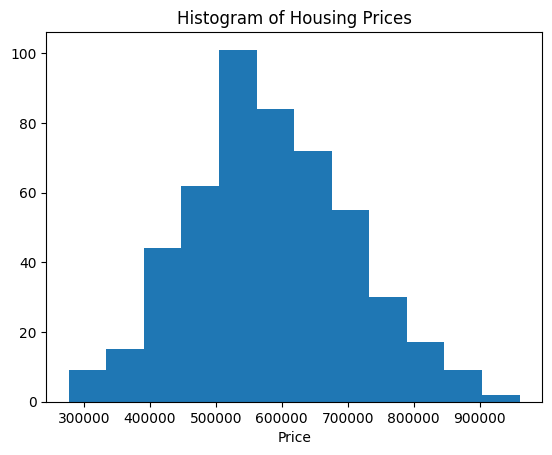

In [38]:
plt.hist(y, bins=12)
plt.title('Histogram of Housing Prices')
plt.xlabel('Price')
plt.show()

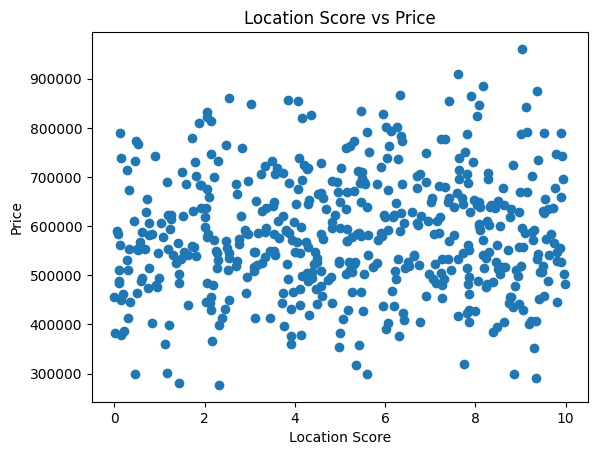

In [5]:
score = df['Location_Score'] # A score from 0 to 10 indicating the quality of the neighborhood (higher scores indicate better neighborhoods).
price = df['Price']
plt.scatter(score, price)
plt.title('Location Score vs Price')
plt.xlabel('Location Score')
plt.ylabel('Price')
plt.show() # No correlation between location score and price shown

In [13]:
correlation_matrix = df.corr()
correlation_matrix

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
ID,1.000000,0.051102,0.014511,0.027395,-0.006343,0.028548,-0.005307,-0.076580,-0.000137,-0.045071,-0.006751,0.031774
Square_Feet,0.051102,1.000000,-0.049918,-0.001667,0.056873,-0.055062,-0.000978,0.007530,-0.051598,-0.035270,0.093080,0.558604
Num_Bedrooms,0.014511,-0.049918,1.000000,-0.056808,0.009088,0.031806,0.017429,0.012039,-0.065481,-0.000357,0.040511,0.563973
Num_Bathrooms,0.027395,-0.001667,-0.056808,1.000000,-0.040895,-0.013407,-0.037040,-0.024880,0.055707,-0.013855,-0.082571,0.156689
Num_Floors,-0.006343,0.056873,0.009088,-0.040895,1.000000,0.046922,0.033256,-0.045630,-0.082763,0.019928,0.035164,0.177435
Year_Built,0.028548,-0.055062,0.031806,-0.013407,0.046922,1.000000,0.000693,-0.065056,-0.008105,0.009614,-0.015113,0.418293
Has_Garden,-0.005307,-0.000978,0.017429,-0.037040,0.033256,0.000693,1.000000,-0.087085,-0.037998,0.019130,0.040305,0.109196
Has_Pool,-0.076580,0.007530,0.012039,-0.024880,-0.045630,-0.065056,-0.087085,1.000000,0.011477,-0.088722,0.110382,0.136579
Garage_Size,-0.000137,-0.051598,-0.065481,0.055707,-0.082763,-0.008105,-0.037998,0.011477,1.000000,-0.029939,-0.061407,0.032100
Location_Score,-0.045071,-0.035270,-0.000357,-0.013855,0.019928,0.009614,0.019130,-0.088722,-0.029939,1.000000,0.054446,0.071326


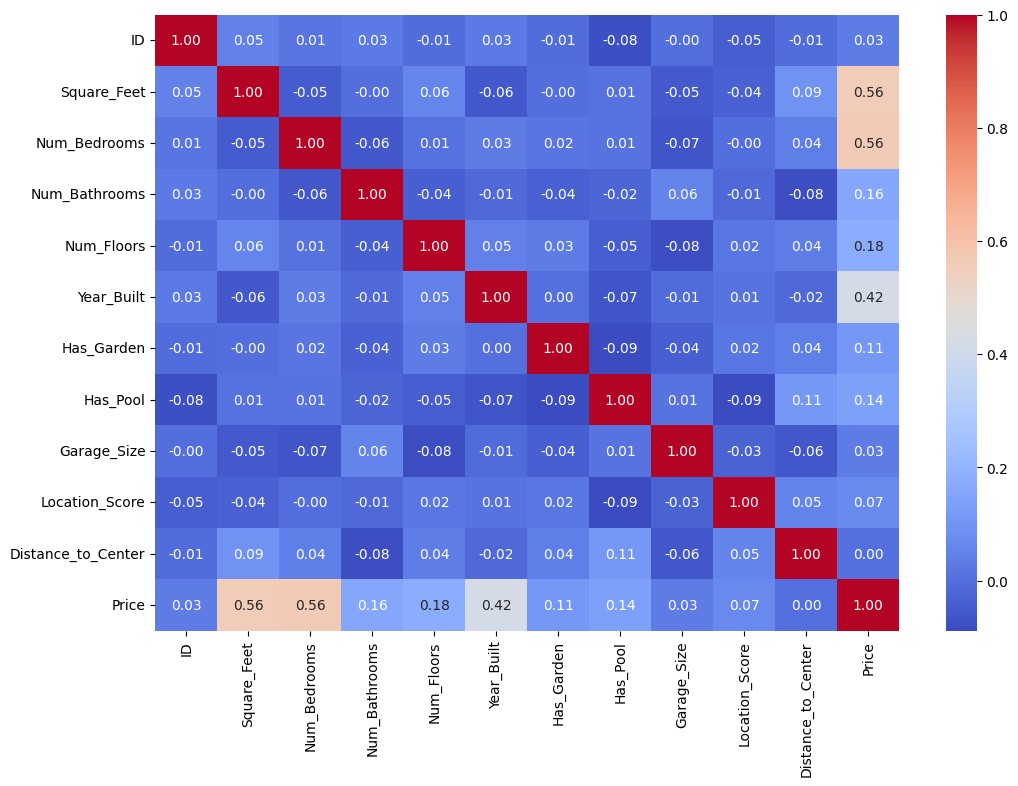

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt="0.2f")
plt.show()
# Square_Feet, Num_Bedrooms, and Year_Built have the highest correlation with Price

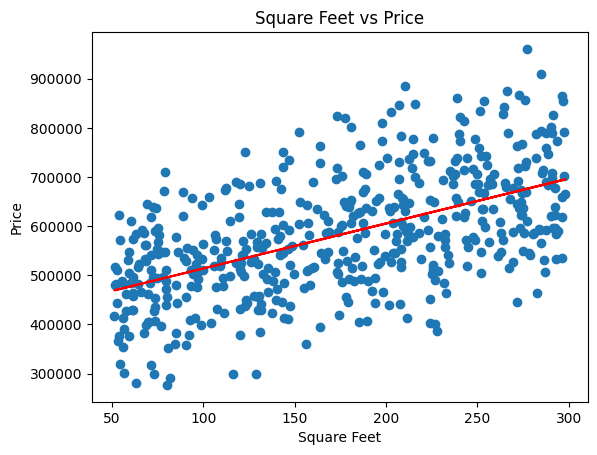

In [6]:
sqr_ft = df[['Square_Feet']]

rgr = LinearRegression()
rgr.fit(sqr_ft, price)
y_predict = rgr.predict(sqr_ft)

plt.scatter(sqr_ft, price)
plt.plot(sqr_ft, y_predict, color='red')
plt.title('Square Feet vs Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

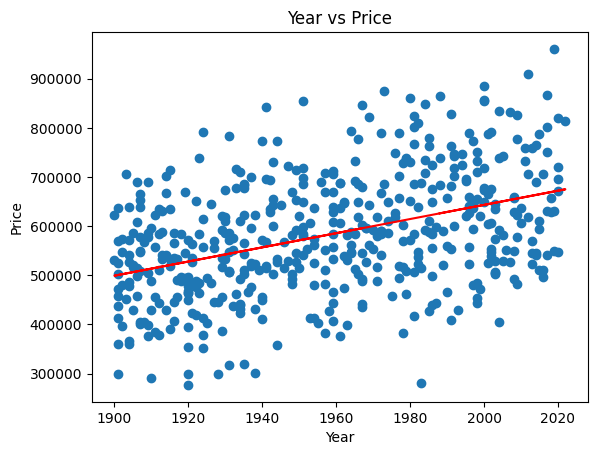

In [26]:
year = df[['Year_Built']]
rgr.fit(year, price)
y_predict3 = rgr.predict(year)

plt.scatter(year, price)
plt.plot(year, y_predict3, color='red')
plt.title('Year vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

In [7]:
# Model Evalution
R2 = r2_score(price, y_predict) #Using actual y values and predicted y values
MSE = mean_squared_error(price, y_predict)
print("R-Squared:", R2, "Mean Squared Error:", MSE)

R-Squared: 0.31203805576206733 Mean Squared Error: 10264997905.211084


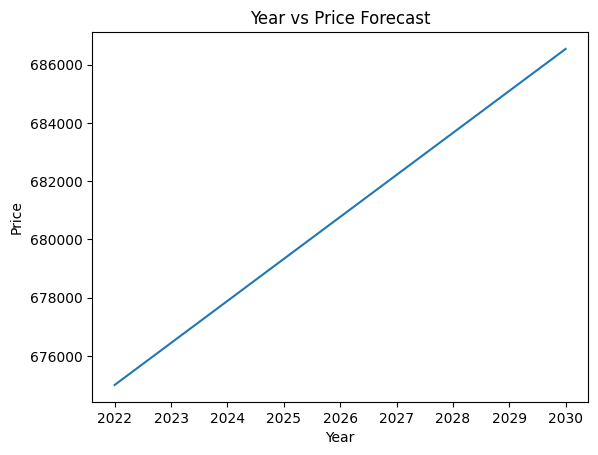

In [33]:
# Predicting housing prices in 2030
years = pd.DataFrame(range(2022,2031))

rgr.fit(year.values, price) #.values gives only values without headers
y_predict2 = rgr.predict(years.values)

plt.plot(years, y_predict2)
plt.title('Year vs Price Forecast')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


In [ ]:
# Using linear regression as a model to predict housing prices 